In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [9]:
train_dir = 'maskdata/maskdata/train'
test_dir = 'maskdata/maskdata/test'

ERROR! Session/line number was not unique in database. History logging moved to new session 63


In [10]:
# Load image

In [11]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [12]:
train_images = train_generator.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

Found 493 images belonging to 2 classes.
Found 123 images belonging to 2 classes.
Found 198 images belonging to 2 classes.


In [13]:
# training

In [14]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 global_average_pooling2d_1   (None, 64)               0   

In [15]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=4,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/4
16/16 [==============================] - 63s 4s/step - loss: 0.6858 - accuracy: 0.5538 - val_loss: 0.6817 - val_accuracy: 0.5528
Epoch 2/4
16/16 [==============================] - 60s 4s/step - loss: 0.6837 - accuracy: 0.5538 - val_loss: 0.6803 - val_accuracy: 0.5528
Epoch 3/4
16/16 [==============================] - 58s 4s/step - loss: 0.6781 - accuracy: 0.5538 - val_loss: 0.6780 - val_accuracy: 0.5528
Epoch 4/4
16/16 [==============================] - 59s 4s/step - loss: 0.6746 - accuracy: 0.5538 - val_loss: 0.6723 - val_accuracy: 0.5610


In [16]:
results = model.evaluate(test_images, verbose=0)
print("    Loss: {:.5f}".format(results[0]))
print("Accuracy: {:.3f}%".format(results[1] * 100))

    Loss: 0.72952
Accuracy: 33.838%


In [17]:
# Visualize result

In [18]:
sample_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

sample_images = sample_generator.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42
)

Found 198 images belonging to 2 classes.


1/1 [==============================] - 2s 2s/step


C:\Users\91998\AppData\Local\Temp\ipykernel_9788\2051451687.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  predictions = np.squeeze(model.predict(samples[0]) >= 0.5).astype(np.int)
C:\Users\91998\AppData\Local\Temp\ipykernel_9788\2051451687.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your

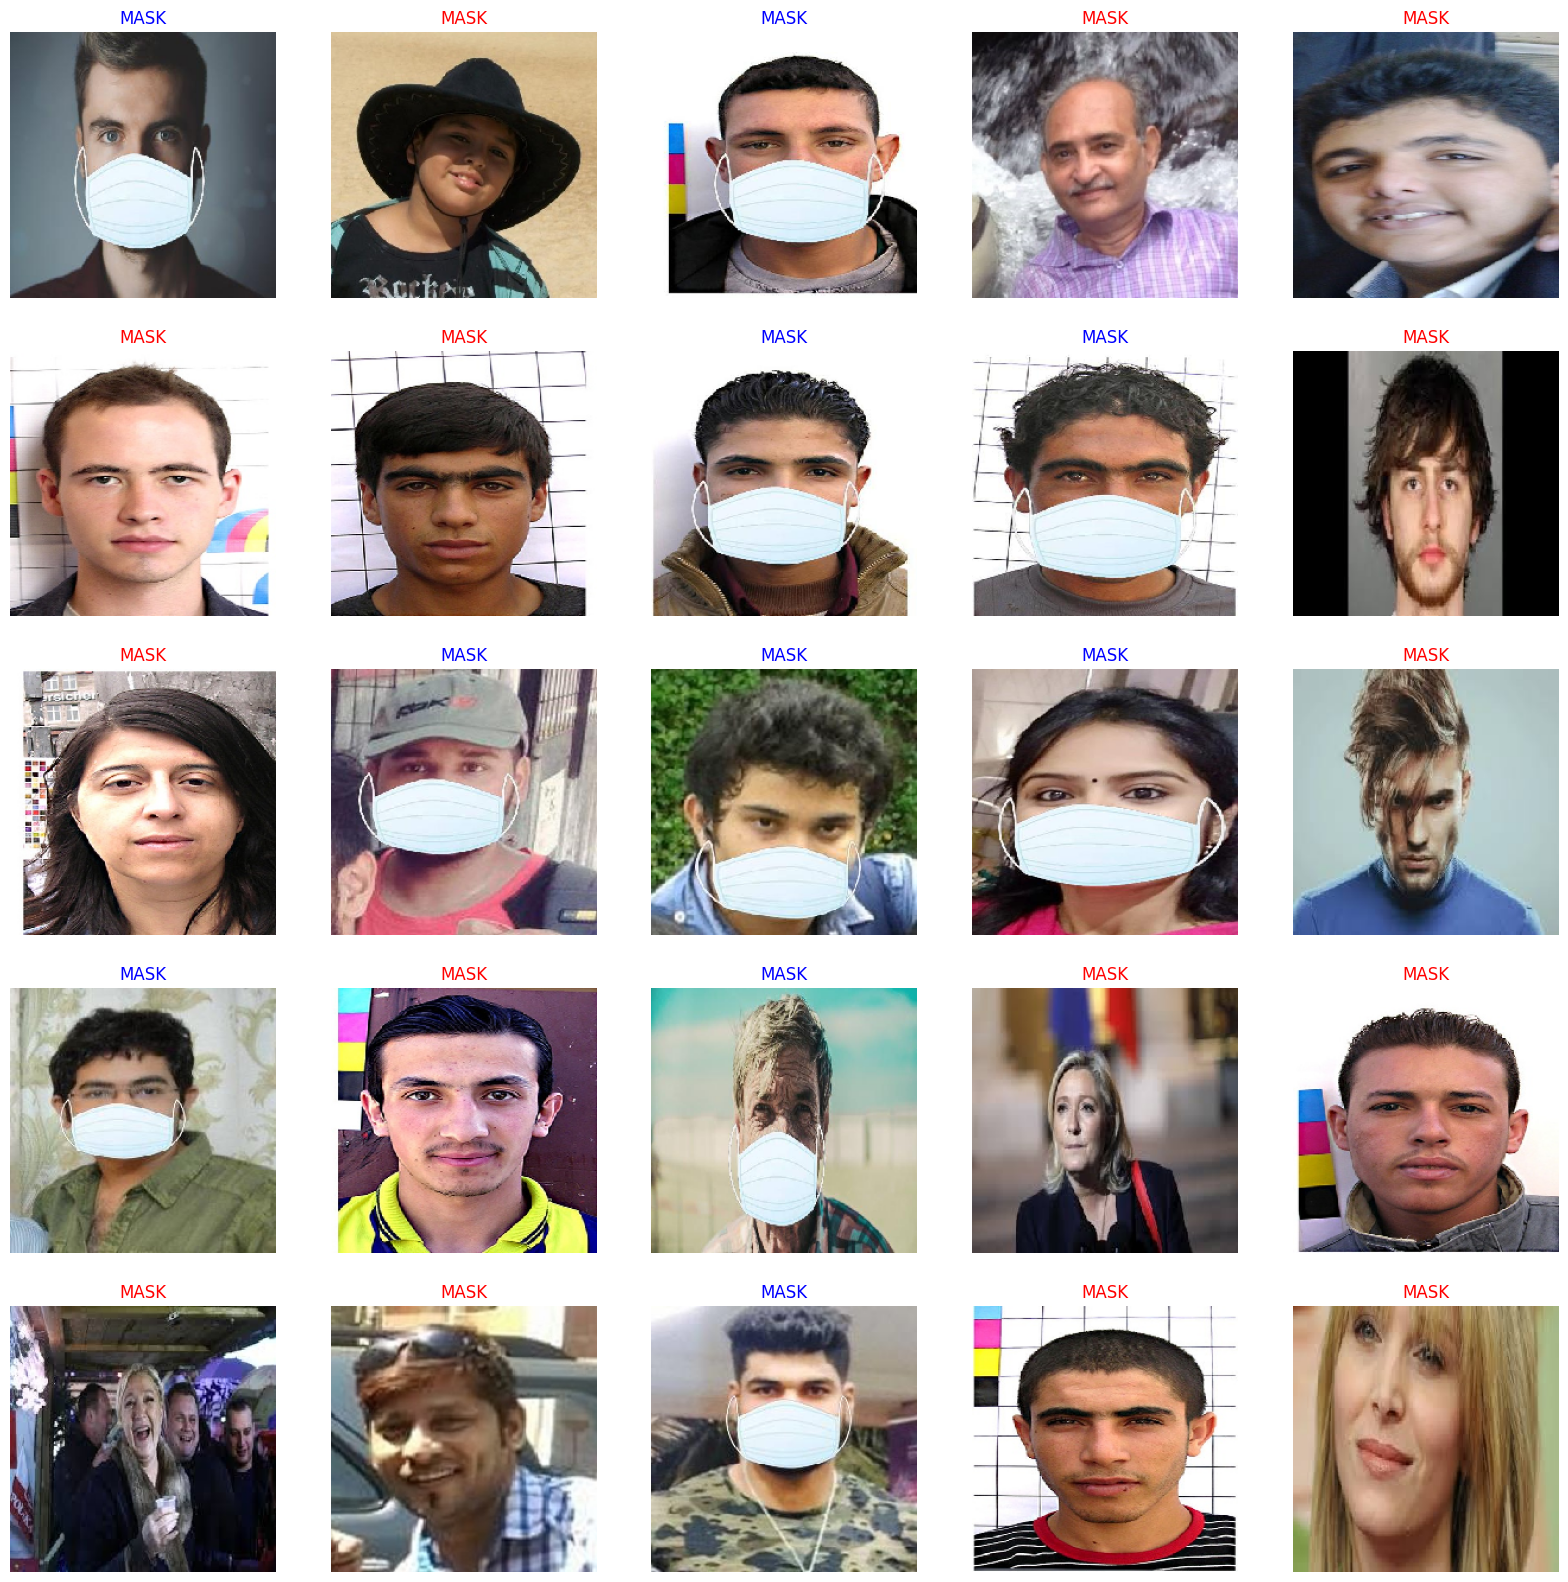

In [19]:
samples = sample_images.next()

predictions = np.squeeze(model.predict(samples[0]) >= 0.5).astype(np.int)
labels = samples[1].astype(np.int)

plt.figure(figsize=(20, 20))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(samples[0][i])
    plt.axis('off')
    plt.title(("NO MASK" if predictions[i] == 1 else "MASK"), color=('blue' if labels[i] == predictions[i] else 'red'))

plt.show()